In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec

In [2]:
# グラフの生成
G = nx.stochastic_block_model([20, 30, 10, 20], [
    [0.4, 0.02, 0.01, 0.01],
    [0.02, 0.2, 0.02, 0.02],
    [0.01, 0.02, 0.5, 0.02],
    [0.01, 0.02, 0.02, 0.6],
], seed=0)

In [3]:
# ラプラシアンの固有値と固有ベクトル
lam, V = np.linalg.eigh(nx.laplacian_matrix(G).todense())

In [4]:
# グラフ上の信号の定義
# 解釈しやすい信号の定義のために逆フーリエ変換で生成
coeffs = [0.5, 0.6, 0.5, 0.4, -0.3, -0.2, -0.3, -0.3, -0.1] # これ以降の係数は 0
x = V[:, 1:10] @ np.array(coeffs) # 逆フーリエ変換（式 6.45）
x = (x - x.min()) / (x.max() - x.min()) # 可視化のために正規化

Text(0.92, 0.18, '+ ...')

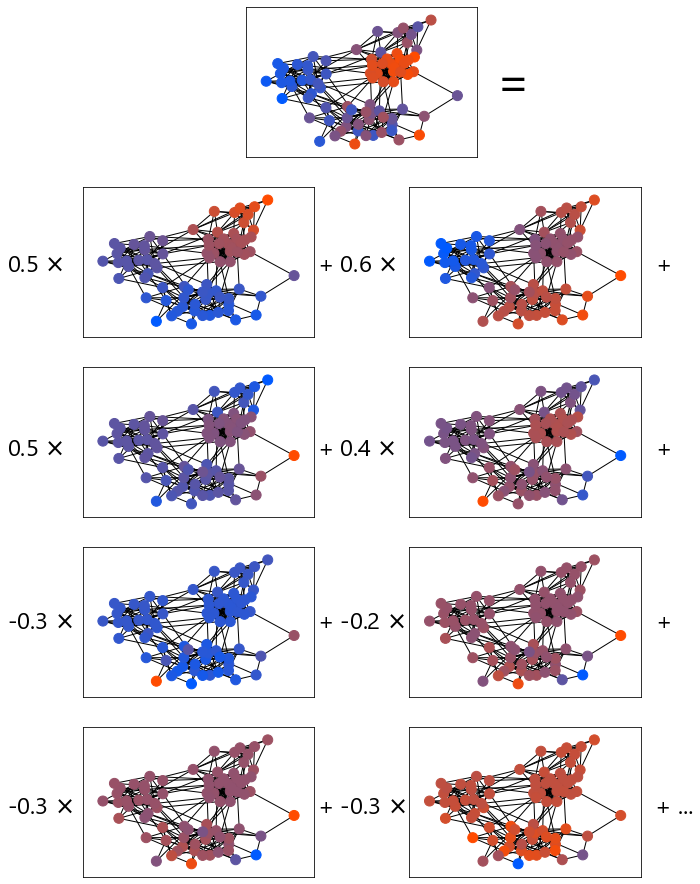

In [5]:
# 信号の図示
fig = plt.figure(figsize=(10, 16))
gs = gridspec.GridSpec(5, 7)
ax = fig.add_subplot(gs[0, 2:5])
color = np.array([255, 75, 0]).reshape(3, 1) * x + np.array([0, 90, 255]).reshape(3, 1) * (1 - x)
pos = nx.layout.spring_layout(G, seed=3)
nx.draw_networkx(G, pos=pos, ax=ax, with_labels=False, node_size=100, node_color=color.T[list(G.nodes)] / 255)

# 成分表示

fig.text(0.7, 0.8, '=', fontsize=48, fontfamily='Segoe UI')

def plot(ax, i):
    x = V[:, i]
    x = (x - x.min()) / (x.max() - x.min())

    color = np.array([255, 75, 0]).reshape(3, 1) * x + np.array([0, 90, 255]).reshape(3, 1) * (1 - x)

    pos = nx.layout.spring_layout(G, seed=3)
    nx.draw_networkx(G, pos=pos, ax=ax, with_labels=False, node_size=100, node_color=color.T[list(G.nodes)] / 255)  

ax = fig.add_subplot(gs[1, :3])
plot(ax, 1)
ax = fig.add_subplot(gs[1, 4:])
plot(ax, 2)

fig.text(0.02, 0.65, format(coeffs[0], '.1f') + ' $\\times$', fontsize=24, fontfamily='Segoe UI')
fig.text(0.45, 0.65, '+ ' + format(coeffs[1], '.1f') + ' $\\times$', fontsize=24, fontfamily='Segoe UI')
fig.text(0.92, 0.65, '+', fontsize=24, fontfamily='Segoe UI')

ax = fig.add_subplot(gs[2, :3])
plot(ax, 3)
ax = fig.add_subplot(gs[2, 4:])
plot(ax, 4)

fig.text(0.02, 0.49, format(coeffs[2], '.1f') + ' $\\times$', fontsize=24, fontfamily='Segoe UI')
fig.text(0.45, 0.49, '+ ' + format(coeffs[3], '.1f') + ' $\\times$', fontsize=24, fontfamily='Segoe UI')
fig.text(0.92, 0.49, '+', fontsize=24, fontfamily='Segoe UI')

ax = fig.add_subplot(gs[3, :3])
plot(ax, 5)
ax = fig.add_subplot(gs[3, 4:])
plot(ax, 6)

fig.text(0.02, 0.34, format(coeffs[4], '.1f') + ' $\\times$', fontsize=24, fontfamily='Segoe UI')
fig.text(0.45, 0.34, '+ ' + format(coeffs[5], '.1f') + ' $\\times$', fontsize=24, fontfamily='Segoe UI')
fig.text(0.92, 0.34, '+', fontsize=24, fontfamily='Segoe UI')


ax = fig.add_subplot(gs[4, :3])
plot(ax, 6)
ax = fig.add_subplot(gs[4, 4:])
plot(ax, 7)

fig.text(0.02, 0.18, format(coeffs[6], '.1f') + ' $\\times$', fontsize=24, fontfamily='Segoe UI')
fig.text(0.45, 0.18, '+ ' + format(coeffs[7], '.1f') + ' $\\times$', fontsize=24, fontfamily='Segoe UI')

fig.text(0.92, 0.18, '+ ...', fontsize=24, fontfamily='Segoe UI')

Text(0.3, 0.34, '=')

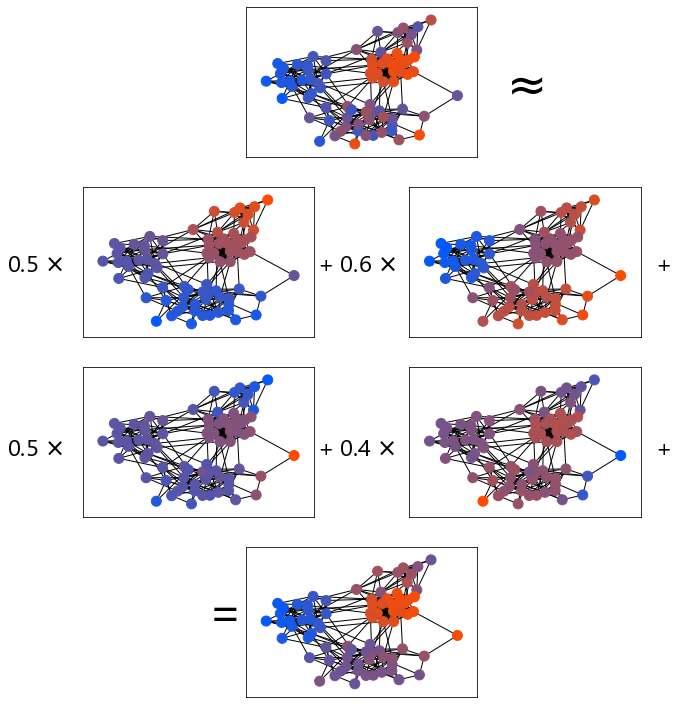

In [6]:
# 低周波成分で近似 = ローパスフィルタ = ノイズ除去
fig = plt.figure(figsize=(10, 16))
gs = gridspec.GridSpec(5, 7)
ax = fig.add_subplot(gs[0, 2:5])
color = np.array([255, 75, 0]).reshape(3, 1) * x + np.array([0, 90, 255]).reshape(3, 1) * (1 - x)
pos = nx.layout.spring_layout(G, seed=3)
nx.draw_networkx(G, pos=pos, ax=ax, with_labels=False, node_size=100, node_color=color.T[list(G.nodes)] / 255)


fig.text(0.7, 0.8, '$\\approx$', fontsize=48, fontfamily='Segoe UI')

ax = fig.add_subplot(gs[1, :3])
plot(ax, 1)
ax = fig.add_subplot(gs[1, 4:])
plot(ax, 2)

fig.text(0.02, 0.65, format(coeffs[0], '.1f') + ' $\\times$', fontsize=24, fontfamily='Segoe UI')
fig.text(0.45, 0.65, '+ ' + format(coeffs[1], '.1f') + ' $\\times$', fontsize=24, fontfamily='Segoe UI')
fig.text(0.92, 0.65, '+', fontsize=24, fontfamily='Segoe UI')

ax = fig.add_subplot(gs[2, :3])
plot(ax, 3)
ax = fig.add_subplot(gs[2, 4:])
plot(ax, 4)

fig.text(0.02, 0.49, format(coeffs[2], '.1f') + ' $\\times$', fontsize=24, fontfamily='Segoe UI')
fig.text(0.45, 0.49, '+ ' + format(coeffs[3], '.1f') + ' $\\times$', fontsize=24, fontfamily='Segoe UI')
fig.text(0.92, 0.49, '+', fontsize=24, fontfamily='Segoe UI')


ax = fig.add_subplot(gs[3, 2:5])
x = V[:, 1:5] @ np.array(coeffs[:4])
x = (x - x.min()) / (x.max() - x.min())
color = np.array([255, 75, 0]).reshape(3, 1) * x + np.array([0, 90, 255]).reshape(3, 1) * (1 - x)
pos = nx.layout.spring_layout(G, seed=3)
nx.draw_networkx(G, pos=pos, ax=ax, with_labels=False, node_size=100, node_color=color.T[list(G.nodes)] / 255)

fig.text(0.3, 0.34, '=', fontsize=48, fontfamily='Segoe UI')